# Explore ULS BGEP

## Read .mat yearly file

In [1]:
import scipy.io
import h5py
from glob import glob
import numpy as np
import xarray as xr
import datetime

from src.utils import save_name

In [30]:
def get_var(name_buoy, year:int):
    '''Open .mat, returns daily variables we want to put into .nc files
    .mat files before 2012 need to be opened with scipy, 2012 and after will h5py
    '''
    
    # globglob the file
    idir = '/scratch/project_465000269/edelleo1/Leo/SIT_observations/ULS_BGEP/mat/'
    ifile = glob(f'{idir}uls{name_buoy}*.mat')
        
    if len(ifile) > 0:
        ifile = ifile[0]
    else:
        print(f'File non existant for: {name_buoy}')
        return None, None, None, None, None, None, None
    
    print(f'Loading: {ifile}')
    
    # load
    if year <= 2011:  # open with scipy.io
        mat = scipy.io.loadmat(ifile)
        
        # get variables
        sit = mat['IDS'][:,1] * 1.1  # ice_draft * 1.1 (as Xiu 2021)
        sit_std = mat['IDS'][:,2] * 1.1
        sit_min = mat['IDS'][:,3] * 1.1
        sit_max = mat['IDS'][:,4] * 1.1

        lat, lon = get_latlon(name_buoy)
        lat = np.array([lat]* sit.shape[0])
        lon = np.array([lon]* sit.shape[0])
        
        # time stamp to datetimes
        dt = np.array([datetime.datetime.strptime(date, '%Y-%m-%d') for date in mat['dates']])
        
    elif year > 2011:  # open with h5py
        mat = h5py.File(ifile)
        
        # get variables
        sit = mat['IDS'][1,:] * 1.1  # ice_draft * 1.1 (as Xiu 2021)
        sit_std = mat['IDS'][2,:] * 1.1
        sit_min = mat['IDS'][3,:] * 1.1
        sit_max = mat['IDS'][4,:] * 1.1
        
        lat, lon = get_latlon(name_buoy)
        lat = np.array([lat]* sit.shape[0])
        lon = np.array([lon]* sit.shape[0])
    
        # time stamp to datetimes
        dt = np.array([datetime.datetime(year,1,1) + datetime.timedelta(days=ydy) for ydy in mat['yday'][:][0]])
    
    
    return sit, sit_std, sit_min, sit_max, lat, lon, dt

In [3]:
# location buoy
# not in .mat file, need to hardcode it (?)

# surveyed latitude/longitude (also used in 2-seconds files)
# translated from degrees minutes seconds to decimal degrees with:
# https://www.fcc.gov/media/radio/dms-decimal

def get_latlon(name_buoy):

    dico_latlon = {'03a': [75.000139, -149.96685],
                   '03b': [78.016803, -149.816723],
                   '03c': [76.983398, -139.900156],
                   '04a': [75.00007, -149.966697],
                   '04b': [78.01669, -149.866794],
                   '04c': [76.983459, -139.966752],
                   '05a': [75.000091, -149.883444],
                   '05b': [77.983507, -149.950266],
                   '05c': [76.966737, -139.983496],
                   '05d': [74.000042, -139.966924],
                   '06a': [74.983604, -149.983605],
                   '06b': [77.983523, -149.966696],
                   '06c': [76.983556, -139.916674],
                   '06d': [74.000018, -139.983467],
                   '11a': [74.983605, -149.966849],
                   '11b': [78.000075, -149.966844],
                   '11c': [73.983506, -139.966908]
                  }
    
    dico_def = {'a': [74.983604, -149.983605],
                'b': [77.983523, -149.966696],
                'c': [76.983556, -139.916674],
                'd': [74.000018, -139.983467]
                }
    
    if name_buoy in dico_latlon:
        return dico_latlon[name_buoy]
    else:
        return dico_def[name_buoy[-1]]

# Create daily time series

.nc files with daily:
mean sit, std, min, max, time (readable format), location (change every year)

In [7]:
sit, sit_std, sit_min, sit_max, lat, lon, dates = get_var('03a', year=2003)

Loading: /scratch/project_465000269/edelleo1/Leo/SIT_observations/ULS_BGEP/mat/uls03a_daily.mat


In [12]:
sit.shape

(363,)

## loop on year for 1 buoy

In [85]:
buoy = 'd'  # a/b/c/d

In [86]:
fsit = []
fsit_std = []
fsit_min = []
fsit_max = []
flat = []
flon = []
fdates = []
valid_years = []

In [87]:
first_year = 2003
last_year = 2018

In [88]:
for yr in range(first_year, last_year+1):
    
    # name_buoy: yyB = year with 2 interger (ex: 03, 08, 11, 18), number of mooring (a/b/c)
    name_buoy = f'{yr}'[-2:] + f'{buoy}'
    sit, sit_std, sit_min, sit_max, lat, lon, dates = get_var(name_buoy, year=yr)
    
    # add yearly data to full timeline
    if sit is not None:
        valid_years.append(yr)
        fsit.append(sit)
        fsit_std.append(sit_std)
        fsit_min.append(sit_min)
        fsit_max.append(sit_max)
        flat.append(lat)
        flon.append(lon)
        fdates.append(dates)

File non existant for: 03d
File non existant for: 04d
File non existant for: 05d
Loading: /scratch/project_465000269/edelleo1/Leo/SIT_observations/ULS_BGEP/mat/uls06d_daily.mat
Loading: /scratch/project_465000269/edelleo1/Leo/SIT_observations/ULS_BGEP/mat/uls07d_dailyn.mat
Loading: /scratch/project_465000269/edelleo1/Leo/SIT_observations/ULS_BGEP/mat/uls08d_dailyn.mat
Loading: /scratch/project_465000269/edelleo1/Leo/SIT_observations/ULS_BGEP/mat/uls09d_dailyn.mat
Loading: /scratch/project_465000269/edelleo1/Leo/SIT_observations/ULS_BGEP/mat/uls10d_dailyn.mat
Loading: /scratch/project_465000269/edelleo1/Leo/SIT_observations/ULS_BGEP/mat/uls11d_dailyn.mat
Loading: /scratch/project_465000269/edelleo1/Leo/SIT_observations/ULS_BGEP/mat/uls12d_dailyn.mat
Loading: /scratch/project_465000269/edelleo1/Leo/SIT_observations/ULS_BGEP/mat/uls13d_dailyn.mat
Loading: /scratch/project_465000269/edelleo1/Leo/SIT_observations/ULS_BGEP/mat/uls14d_dailyn.mat
Loading: /scratch/project_465000269/edelleo1/Le

In [89]:
fsit = np.concatenate(fsit, axis=0)
fsit_std = np.concatenate(fsit_std, axis=0)
fsit_min = np.concatenate(fsit_min, axis=0)
fsit_max = np.concatenate(fsit_max, axis=0)
flat = np.concatenate(flat, axis=0)
flon = np.concatenate(flon, axis=0)
fdates = np.concatenate(fdates, axis=0)

In [90]:
print(f'Number of valid days: {fsit.shape[0]}')

Number of valid days: 5448


## Save netcdf

In [91]:
odir = '/scratch/project_465000269/edelleo1/Leo/SIT_observations/ULS_BGEP/netcdf/'

In [92]:
osit = xr.DataArray(fsit, 
                coords={'time': fdates}, 
                dims=["time"],
                attrs={'name':'sit',
                       'long_name':'mean sea ice thickness',
                       'unit':'m',
                      })

In [93]:
osit_std = xr.DataArray(fsit_std, 
                coords={'time': fdates}, 
                dims=["time"],
                attrs={'name':'sit_std',
                       'long_name':'sea ice thickness standard deviation',
                       'unit':'m',
                      })

In [94]:
osit_min = xr.DataArray(fsit_min, 
                coords={'time': fdates}, 
                dims=["time"],
                attrs={'name':'sit_min',
                       'long_name':'minimum sea ice thickness',
                       'unit':'m',
                      })

In [95]:
osit_max = xr.DataArray(fsit_max, 
                coords={'time': fdates}, 
                dims=["time"],
                attrs={'name':'sit_max',
                       'long_name':'maximum sea ice thickness',
                       'unit':'m',
                      })

In [96]:
olat = xr.DataArray(flat, 
                coords={'time': fdates}, 
                dims=["time"],
                attrs={'name':'latitude',
                       'unit':'North'
                      })

In [97]:
olon = xr.DataArray(flon, 
                coords={'time': fdates}, 
                dims=["time"],
                attrs={'name':'longitude',
                       'unit':'East'
                      })

In [98]:
ods = xr.Dataset(data_vars={'sit':    osit,
                            'sit_std':osit_std,
                            'sit_min':osit_min,
                            'sit_max':osit_max,
                            'lat':olat,
                            'lon':olon
                           },
                   attrs=dict(
                       description='Timeseries of SIT from ULS BGEP',
                       years=f'from {first_year} until {last_year}',
                       valid_years=f'{valid_years}',
                       mooring=f'{buoy.upper()}',
                       author='Leo Edel, Nersc',
                       project='TARDIS',
                       date=f'{datetime.date.today()}')
                  )

In [99]:
ods

<xarray.Dataset>
Dimensions:  (time: 5448)
Coordinates:
  * time     (time) datetime64[ns] 2006-09-10 2006-09-11 ... 2021-08-20
Data variables:
    sit      (time) float64 1.073 0.9789 0.8358 1.21 ... 0.6287 0.4841 0.881
    sit_std  (time) float64 1.25 1.189 1.199 1.314 ... 0.8402 0.7605 1.337
    sit_min  (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.03592 0.0146 0.02786 0.0
    sit_max  (time) float64 11.68 8.878 9.556 7.855 ... 5.65 7.477 8.706 12.97
    lat      (time) float64 74.0 74.0 74.0 74.0 74.0 ... 74.0 74.0 74.0 74.0
    lon      (time) float64 -140.0 -140.0 -140.0 -140.0 ... -140.0 -140.0 -140.0
Attributes:
    description:  Timeseries of SIT from ULS BGEP
    years:        from 2003 until 2018
    valid_years:  [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015...
    mooring:      D
    author:       Leo Edel, Nersc
    project:      TARDIS
    date:         2023-07-26

In [100]:
filename = f'uls{buoy.upper()}_{first_year}_{last_year}.nc'

In [101]:
ofile = save_name.check(f"{odir}", filename)
ods.to_netcdf(f'{odir}{ofile}')
print(f'Netcdf saved as: {odir}{ofile}')

Netcdf saved as: /scratch/project_465000269/edelleo1/Leo/SIT_observations/ULS_BGEP/netcdf/ulsD_2003_2018.nc


# Plot time series

In [236]:
import matplotlib.pyplot as plt

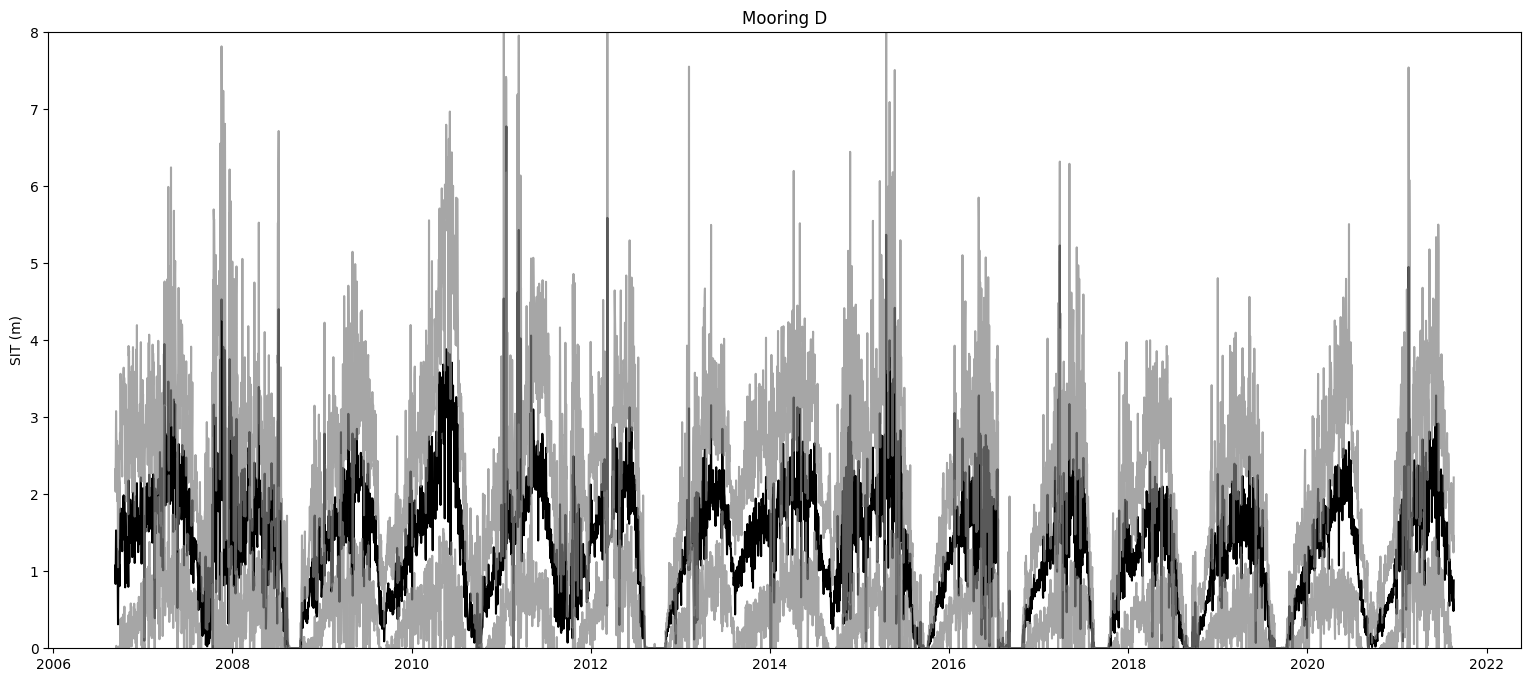

In [239]:
plt.figure(figsize=(19,8))

plt.plot(fdates, fsit, 'k')
plt.plot(fdates, fsit+fsit_std, c='grey', alpha=0.7)
plt.plot(fdates, fsit-fsit_std, c='grey', alpha=0.7)

plt.ylim([0,8])
plt.ylabel('SIT (m)')
plt.title(f'Mooring {buoy.upper()}');